In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score

In [2]:
tabela = pd.read_excel('imoveis_uberlandia.xlsx')
display(tabela)

,titulo,tipo_imovel,metragem,link,quartos,vagas,banheiros,preco,bairro
0,"Casa com 3 Quartos para Aluguel, 161m²",apartamento,161,https://www.vivareal.com.br/imovel/casa-3-quar...,3,2,3,2000,santa_monica
1,Apartamento com 2 Quartos à Venda/Aluguel 71...,apartamento,71,https://www.vivareal.com.br/imovel/casa-3-quar...,2,2,2,180,santa_monica
2,"Apartamento com 3 Quartos para Aluguel, 108m²",apartamento,108,https://www.vivareal.com.br/imovel/casa-3-quar...,3,2,2,1750,santa_monica
3,"Apartamento com 3 Quartos para Aluguel, 90m²",apartamento,90,https://www.vivareal.com.br/imovel/casa-3-quar...,3,2,1,1980,santa_monica
4,"Apartamento com 3 Quartos para Aluguel, 107m²",apartamento,107,https://www.vivareal.com.br/imovel/casa-3-quar...,3,2,2,2600,santa_monica
...,...,...,...,...,...,...,...,...,...
46219,"Apartamento com 2 Quartos para Aluguel, 58m²",apartamento,58,https://www.vivareal.com.br/imovel/apartamento...,2,1,2,1550,loteamento_portal_do_vale_ii
46220,"Casa com 3 Quartos para Aluguel, 220m²",apartamento,220,https://www.vivareal.com.br/imovel/apartamento...,3,2,2,3000,loteamento_portal_do_vale_ii
46221,"Ponto comercial/Loja/Box para Aluguel, 88...",apartamento,88,https://www.vivareal.com.br/imovel/apartamento...,--,24,1,2200,loteamento_portal_do_vale_ii
46222,"Apartamento com 2 Quartos para Aluguel, 50m²",apartamento,50,https://www.vivareal.com.br/imovel/apartamento...,2,1,1,750,loteamento_portal_do_vale_ii


In [3]:
tabela = tabela.drop(['titulo', 'link', 'tipo_imovel'], axis=1)

In [4]:
bairros = pd.read_excel('imoveis_uberlandia.xlsx')
bairros = bairros['bairro']
for bairro in bairros:
    if bairro == 'morada_da_colina':
        print(bairro)
print(bairros)

morada_da_colina
morada_da_colina
0                        santa_monica
1                        santa_monica
2                        santa_monica
3                        santa_monica
4                        santa_monica
                     ...             
46219    loteamento_portal_do_vale_ii
46220    loteamento_portal_do_vale_ii
46221    loteamento_portal_do_vale_ii
46222    loteamento_portal_do_vale_ii
46223    loteamento_portal_do_vale_ii
Name: bairro, Length: 46224, dtype: object


In [5]:
tabela = tabela.replace(' -- ', None)
tabela = tabela.dropna()

In [6]:
tabela['metragem'] = tabela['metragem'].fillna(0).astype(int)
tabela['quartos'] = tabela['quartos'].fillna(0).astype(int)
tabela['vagas'] = tabela['vagas'].fillna(0).astype(int)
tabela['banheiros'] = tabela['banheiros'].fillna(0).astype(int)


In [7]:
# tranforma os valores da coluna bairro em numeros representativos 
tabela['bairro'] = pd.factorize(tabela['bairro'])[0]

bairros_representacao = pd.DataFrame()
bairros_representacao['alfabetico'] = bairros
bairros_representacao['numerico'] = tabela['bairro']
bairros_representacao = bairros_representacao.drop_duplicates(subset='alfabetico')


display(bairros_representacao)


,alfabetico,numerico
0,santa_monica,0.0
864,centro,1.0
2808,nossa_senhora_aparecida,2.0
4968,brasil,3.0
5184,vila_ana_angelica,4.0
...,...,...
35208,jardim_ipanema,NaN
38232,city_uberlandia,64.0
39312,sao_jose,NaN
40392,residencial_gramado,66.0


In [8]:
tabela_treino = tabela.dropna()
tabela_teste = tabela_treino.head(n=40)
tabela_treino = tabela_treino.drop(tabela_teste.index[:40])
print(tabela_treino.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35346 entries, 48 to 46223
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   metragem   35346 non-null  int32
 1   quartos    35346 non-null  int32
 2   vagas      35346 non-null  int32
 3   banheiros  35346 non-null  int32
 4   preco      35346 non-null  int64
 5   bairro     35346 non-null  int64
dtypes: int32(4), int64(2)
memory usage: 1.3 MB
None


In [9]:
display(tabela_treino.head(n=20))

,metragem,quartos,vagas,banheiros,preco,bairro
48,92,3,2,2,2800,0
49,150,3,2,1,2200,0
52,108,3,1,2,2800,0
54,320,4,4,5,5000,0
57,210,4,2,1,5500,0
59,80,2,2,3,1900,0
60,44,2,1,1,1300,0
61,150,3,2,2,2500,0
62,55,2,1,1,850,0
63,200,3,2,1,2000,0


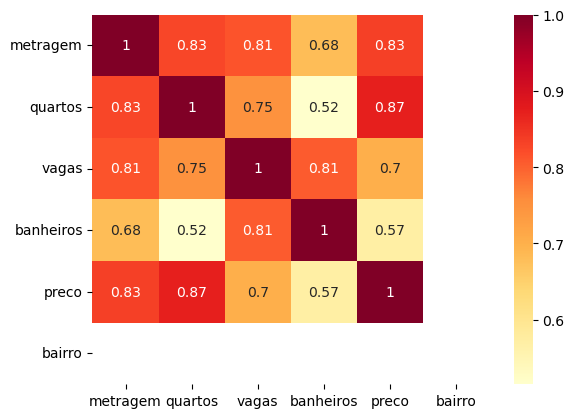

In [10]:
correlacao = tabela_teste.corr()
sns.heatmap(data=correlacao, cmap= 'YlOrRd', annot=True)
plt.show()

In [11]:
y = tabela_treino['preco']
x = tabela_treino.drop('preco', axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)

In [12]:
#criar inteligencia artifical
modelo =  ()
modelo_2 = BaggingRegressor()

In [13]:
#treina inteligencia artificial
modelo.fit(x_treino, y_treino)
modelo_2.fit(x_treino, y_treino)

BaggingRegressor()

In [14]:
previsao = modelo.predict(x_teste)
previsao_2 = modelo_2.predict(x_teste)
print(r2_score(y_teste, previsao))
print(r2_score(y_teste, previsao_2))

0.9982206858866877
0.9979930102944715


In [15]:
tabela_visualizacao = pd.DataFrame()
tabela_visualizacao['y_teste'] = y_teste

tabela_visualizacao['previsao 1'] = previsao
#tabela_visualizacao['previsao 2'] = previsao_2

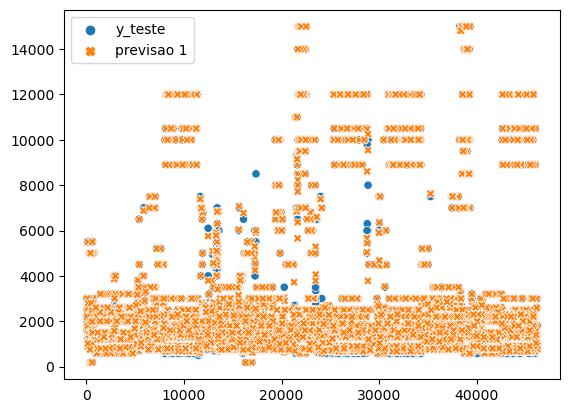

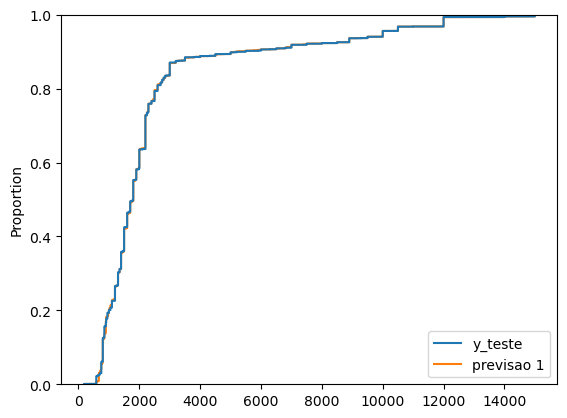

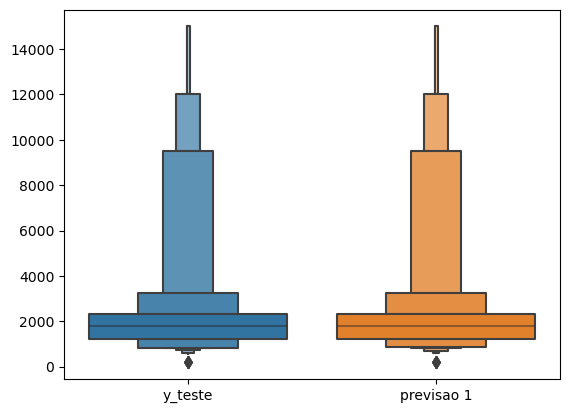

In [16]:
sns.scatterplot(data=tabela_visualizacao)
plt.show()

sns.ecdfplot(data=tabela_visualizacao)
plt.show()

sns.boxenplot(data=tabela_visualizacao)
plt.show()

In [17]:
display(tabela_teste)

,metragem,quartos,vagas,banheiros,preco,bairro
0,161,3,2,3,2000,0
1,71,2,2,2,180,0
2,108,3,2,2,1750,0
3,90,3,2,1,1980,0
4,107,3,2,2,2600,0
5,234,3,2,2,3000,0
6,57,2,1,1,1500,0
7,118,3,1,1,1800,0
8,115,3,2,1,1800,0
9,86,3,2,2,2700,0


In [18]:
tabela_teste = tabela_teste.drop('preco', axis=1)

In [19]:
previsao = modelo_2.predict(tabela_teste)

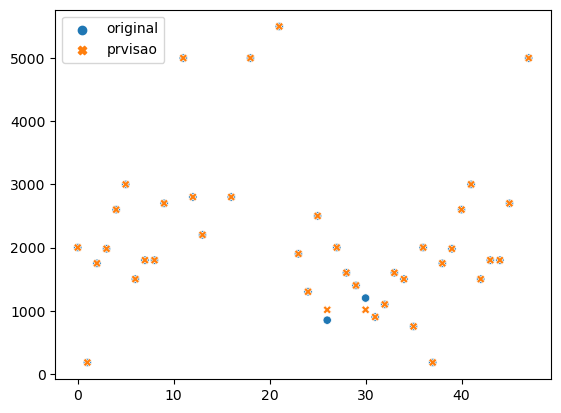

In [20]:
visualiza = pd.DataFrame()
visualiza['original'] = tabela.head(n=40)['preco']
visualiza['prvisao'] = previsao

sns.scatterplot(data=visualiza)
plt.show()

In [21]:
display(visualiza)

,original,prvisao
0,2000,2000.000000
1,180,180.000000
2,1750,1750.000000
3,1980,1980.000000
4,2600,2600.000000
5,3000,3000.000000
6,1500,1500.000000
7,1800,1800.000000
8,1800,1800.000000
9,2700,2700.000000


In [22]:
nova_testagem = pd.DataFrame()

sizes = len(bairros_representacao['alfabetico'])

metragem = 100
quartos = 3
vagas = 1
banheiros = 3

nova_testagem['metragem'] = [metragem for i in range(sizes)]
nova_testagem['quartos'] = [quartos for i in range(sizes)]
nova_testagem['vagas'] = [vagas for i in range(sizes)]
nova_testagem['banheiros'] = [banheiros for i in range(sizes)]
nova_testagem['bairro'] = [i for i in range(sizes)]


print(nova_testagem)


    metragem  quartos  vagas  banheiros  bairro
0        100        3      1          3       0
1        100        3      1          3       1
2        100        3      1          3       2
3        100        3      1          3       3
4        100        3      1          3       4
..       ...      ...    ...        ...     ...
64       100        3      1          3      64
65       100        3      1          3      65
66       100        3      1          3      66
67       100        3      1          3      67
68       100        3      1          3      68

[69 rows x 5 columns]


In [23]:
previsao_2 = modelo.predict(nova_testagem)
nova_testagem['preco'] = previsao_2

<AxesSubplot:>

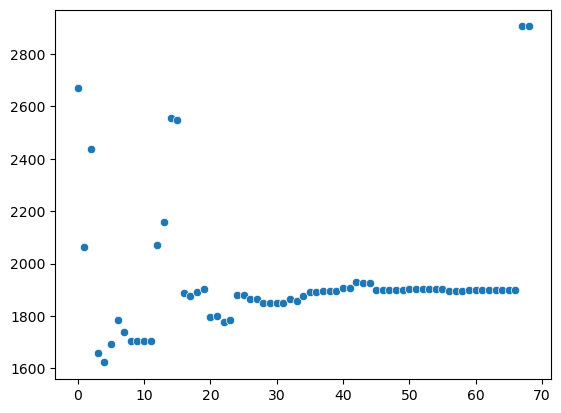

In [24]:
sns.scatterplot(data=previsao_2)

In [25]:
nova_testagem['alfabetico'] = [i for i in bairros_representacao['alfabetico']]

display(nova_testagem.loc[1:45])
display(nova_testagem.loc[46:69])

,metragem,quartos,vagas,banheiros,bairro,preco,alfabetico
1,100,3,1,3,1,2063.5,centro
2,100,3,1,3,2,2436.0,nossa_senhora_aparecida
3,100,3,1,3,3,1659.5,brasil
4,100,3,1,3,4,1622.5,vila_ana_angelica
5,100,3,1,3,5,1694.0,saraiva
6,100,3,1,3,6,1785.0,patrimonio
7,100,3,1,3,7,1740.0,fundinho
8,100,3,1,3,8,1704.0,osvaldo_rezende
9,100,3,1,3,9,1705.0,lidice
10,100,3,1,3,10,1705.0,presidente_roosevelt


,metragem,quartos,vagas,banheiros,bairro,preco,alfabetico
46,100,3,1,3,46,1898.50,santa_rosa
47,100,3,1,3,47,1898.50,jardim_canaa
48,100,3,1,3,48,1898.50,carajas
49,100,3,1,3,49,1898.50,tabajaras
50,100,3,1,3,50,1904.81,pampulha
51,100,3,1,3,51,1904.81,panorama
52,100,3,1,3,52,1904.81,morumbi
53,100,3,1,3,53,1904.81,conjunto_alvorada
54,100,3,1,3,54,1904.81,granja_marileusa
55,100,3,1,3,55,1904.81,santa_luzia
